### Topic - Stroke Prediction using Machine Learning

#### Introduction


Stroke is a severe cerebrovascular disease caused by an interruption of blood flow from and to
the brain. As a direct consequence of this interruption, the brain is not able to receive oxygen
and nutrients for its correct functioning. The other way around, the brain is not able to drain and
expel through blood vessels all of its waste, like dead cells. In a question of minutes, the brain is
in a critical condition as brain cells will imminently begin to die.

The American Stroke Association indicates that stroke is the fifth cause of death and disability in
the United States. For this reason, stroke is considered a severe disease and has been the
subject of extensive research, not only in the medical field but also in data science and machine
learning studies

### Dataset Description -

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

#### 1. Read the dataset and view the first 10 rows of it

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


#### Check the shape/dimension of the dataset

In [4]:
df.shape

(5110, 12)

#### Check for the missing values.Display number of missing values per column

In [5]:
df.isnull().sum()  #Missing values per column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.isnull().sum()/len(df)*100  #% of missing values.

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

#### Investigate and predict the missing BMI Value.

In [7]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

BMI Skewness 1.0553402052962912


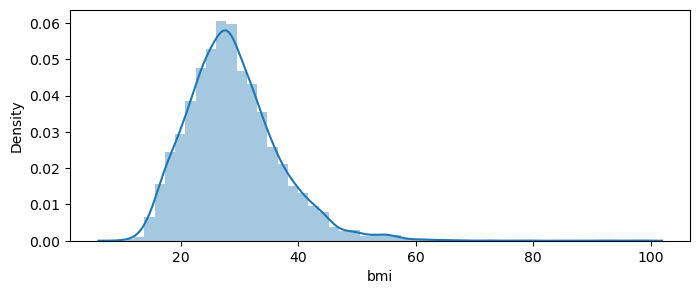

In [8]:
plt.figure(figsize=(8,3))
sns.distplot(df['bmi'])
print('BMI Skewness',df['bmi'].skew())
plt.show()

#### Check the datatype, number of non null values and name of each variable in the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
#Only BMI contains 4909 of non null values, other than that there are no missing values.

In [11]:
#Since the BMI is right skewed, filling it with median.

In [12]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

#### Check the descriptive statistics of the dataset

In [13]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Visualize the proportion of Stroke samples in the dataset

In [14]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

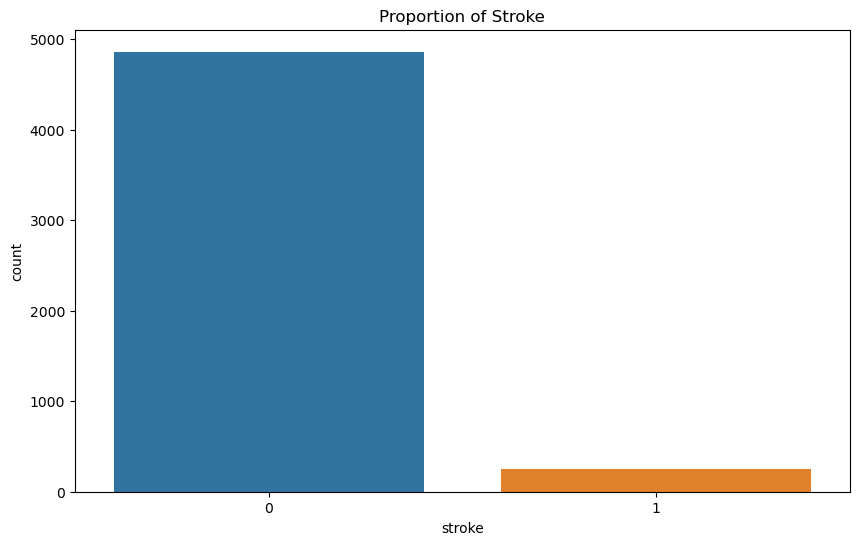

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(df['stroke'])
plt.title('Proportion of Stroke')
plt.show()

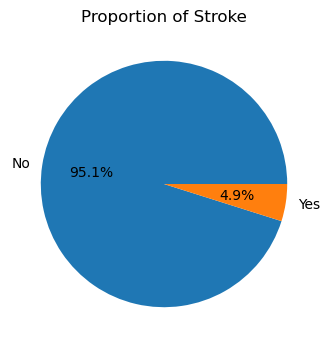

In [16]:
plt.figure(figsize=(8,4))
plt.pie(df['stroke'].value_counts(),autopct='%1.1f%%',labels=['No','Yes'])
plt.title('Proportion of Stroke')
plt.show()

In [17]:
#The proportion of stroke is less compared to non stroke people.

#### Visualize the Distribution of Male and Female Ages. Write the Observation.

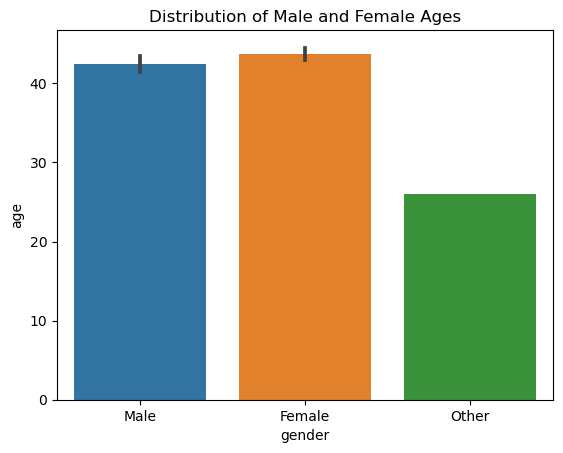

In [18]:
sns.barplot(df['gender'],y=df['age'])
plt.title('Distribution of Male and Female Ages')
plt.show()

In [19]:
#The distribution of male and female ages are same and around 40.

#### Visualize the stroke sample based on
a) BMI and Glucose Level
b) BMI and Age


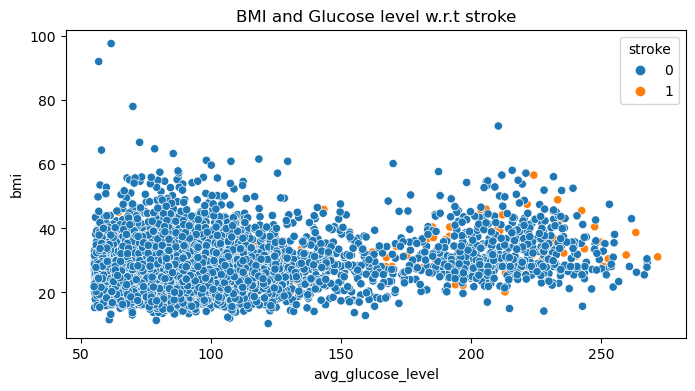

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(y=df['bmi'],x=df['avg_glucose_level'],hue=df['stroke'])
plt.title('BMI and Glucose level w.r.t stroke')
plt.show()

In [21]:
#We can see people getting stroke when the avg glucose level increases.

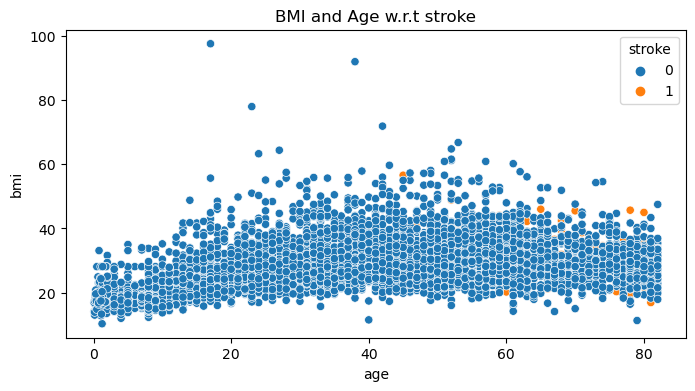

In [22]:
plt.figure(figsize=(8,4))
sns.scatterplot(y=df['bmi'],x=df['age'],hue=df['stroke'])
plt.title('BMI and Age w.r.t stroke')
plt.show()

In [23]:
#People older than 40 are getting strokes.

#### Using the pie chart visualizes the proportion of different smoking categories among the stroke population

In [24]:
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [25]:
stroke_yes=df[df['stroke']==1]

In [26]:
value_counts_stroke=stroke_yes['smoking_status'].value_counts()

In [27]:
value_counts_stroke.index

Index(['never smoked', 'formerly smoked', 'Unknown', 'smokes'], dtype='object')

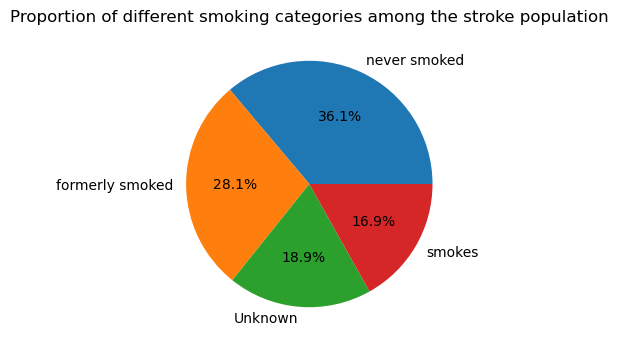

In [28]:
plt.figure(figsize=(8,4))
plt.pie(stroke_yes['smoking_status'].value_counts(),autopct='%1.1f%%',
        labels=value_counts_stroke.index)
plt.title('Proportion of different smoking categories among the stroke population')
plt.show()

#### Perform hypothesis testing to find the significant variables.

In [29]:
num_cols=df.select_dtypes(include=np.number)

In [30]:
#Null Hypothesis (H0): There is no significant relationship between the independent variable(s) 
#and the dependent variable.
#Alternative Hypothesis (H1): There is a significant relationship between the independent
#variable(s) and the dependent variable.

In [31]:
significant_variables=[]
for i in num_cols:
    if i!='stroke':
        pvalue=stats.ttest_ind(num_cols[i],df['stroke'])[1]
        print(i,':',pvalue)
        if pvalue<0.05:
            significant_variables.append(i)

id : 0.0
age : 0.0
hypertension : 2.4828630276395242e-21
heart_disease : 0.22637221796027793
avg_glucose_level : 0.0
bmi : 0.0


In [32]:
print('Significant Variables:',significant_variables)

Significant Variables: ['id', 'age', 'hypertension', 'avg_glucose_level', 'bmi']


#### Drop the unnecessary columns.

In [33]:
df.drop('id',axis=1,inplace=True)

In [34]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### Write the code to replace following categories columns in integer format as follow –
a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
 b) ever_married('Yes': 1, 'No': 0) c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [35]:
#a)
df['work_type']=df['work_type'].replace('Private',0).replace('Self-employed',1).replace('Govt_job',2).replace('children',1).replace('Never_worked',-2)

In [36]:
#b)
df['ever_married']=df['ever_married'].replace('Yes',1).replace('No',0)

In [37]:
#c)
df['smoking_status']=df['smoking_status'].replace('never smoked',0).replace('Unknown',1).replace('formerly smoked',2).replace('smokes',-1)

#### Check the distribution of 'bmi' and 'stroke' columns in the dataset

BMI Skewness 1.0881872326442346


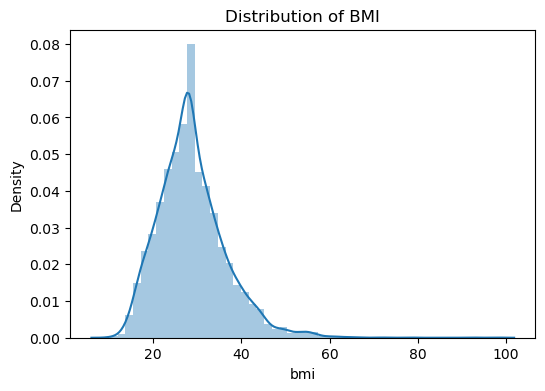

In [38]:
plt.figure(figsize=(6,4))
sns.distplot(df['bmi'])
plt.title('Distribution of BMI')
print('BMI Skewness',df['bmi'].skew())

In [39]:
#BMI is right skewed, indication presence of outliers at the right side of the data.

Stroke Skewness 4.193284486071313


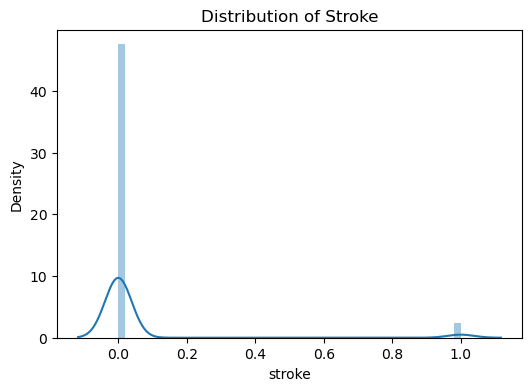

In [40]:
plt.figure(figsize=(6,4))
sns.distplot(df['stroke'])
plt.title('Distribution of Stroke')
print('Stroke Skewness',df['stroke'].skew())

In [41]:
num_cols=df.select_dtypes(include=np.number)

In [42]:
num_cols1=num_cols.columns.to_list()

#### List down columns that are highly skewed.

In [43]:
high_skew=[]
for i in num_cols1:
    if (num_cols[i].skew()>0.5)|(num_cols[i].skew()<-0.5):
        high_skew.append(i)
print('Highly skewed columns are \n' ,high_skew)

Highly skewed columns are 
 ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'avg_glucose_level', 'bmi', 'stroke']


#### List down the columns that are highly kurtosis.

In [44]:
high_kurt=[]
for i in num_cols1:
    if (num_cols[i].kurt()>1)|(num_cols[i].kurt()<1):
        high_kurt.append(i)
print('Highly skewed columns are \n' ,high_kurt)

Highly skewed columns are 
 ['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [45]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [46]:
# Encoding gender variable
df['gender']=df['gender'].replace('Male',0).replace('Female',1).replace('Other',1)

In [47]:
# Encoding Residence_type variable
df['Residence_type']=df['Residence_type'].replace({'Urban':0,'Rural':1})

#### Find the distribution of all variables with respect to the outcome 'stroke' variable

In [48]:
cols=df.columns.to_list()

In [49]:
cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

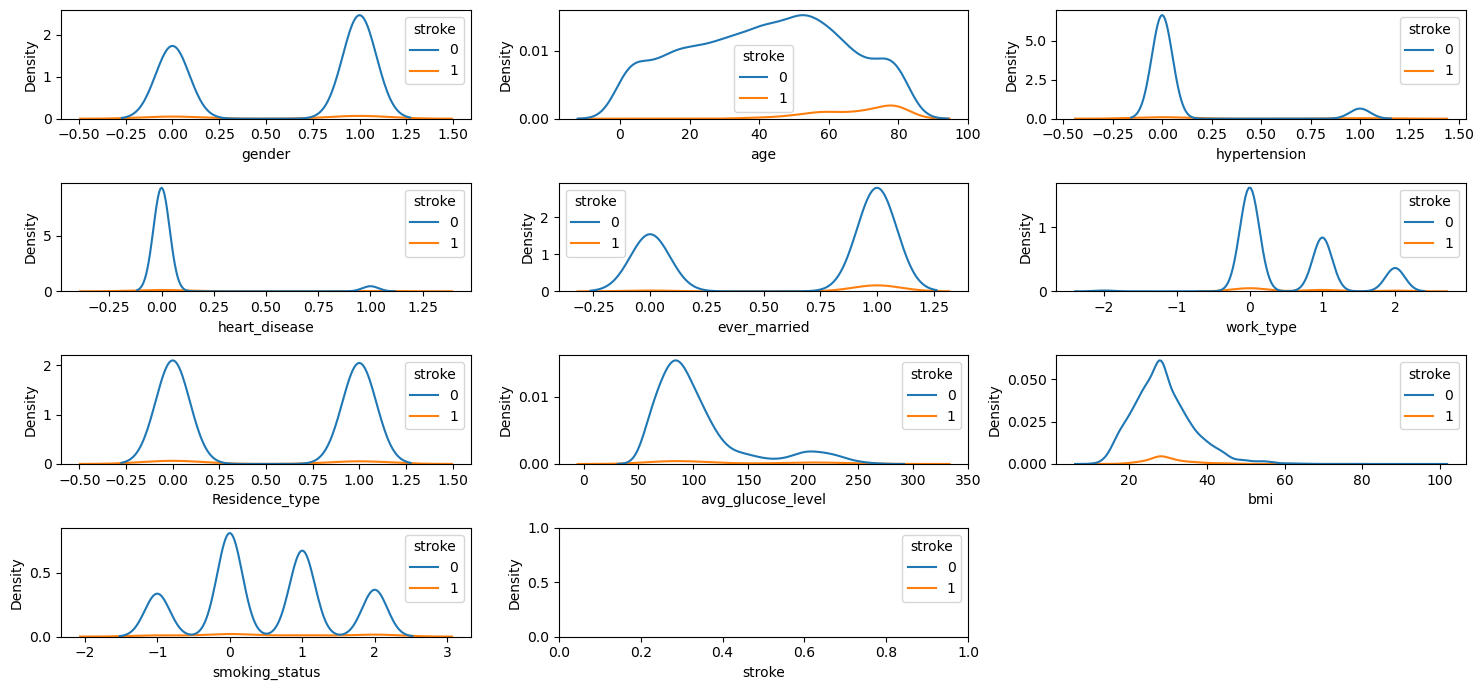

In [50]:
plt.figure(figsize=(15,7))
it=1
for i in cols:
    plt.subplot(4,3,it)
    sns.kdeplot(df[i],hue=df['stroke'])
    it+=1
plt.tight_layout()
plt.show()

#### Plot the heatmap for correlation matrix for the given dataset. Write the observation.Especially note down columns that are highly correlated (Positive or negative correlation,consider 0.7 to 1 as high)


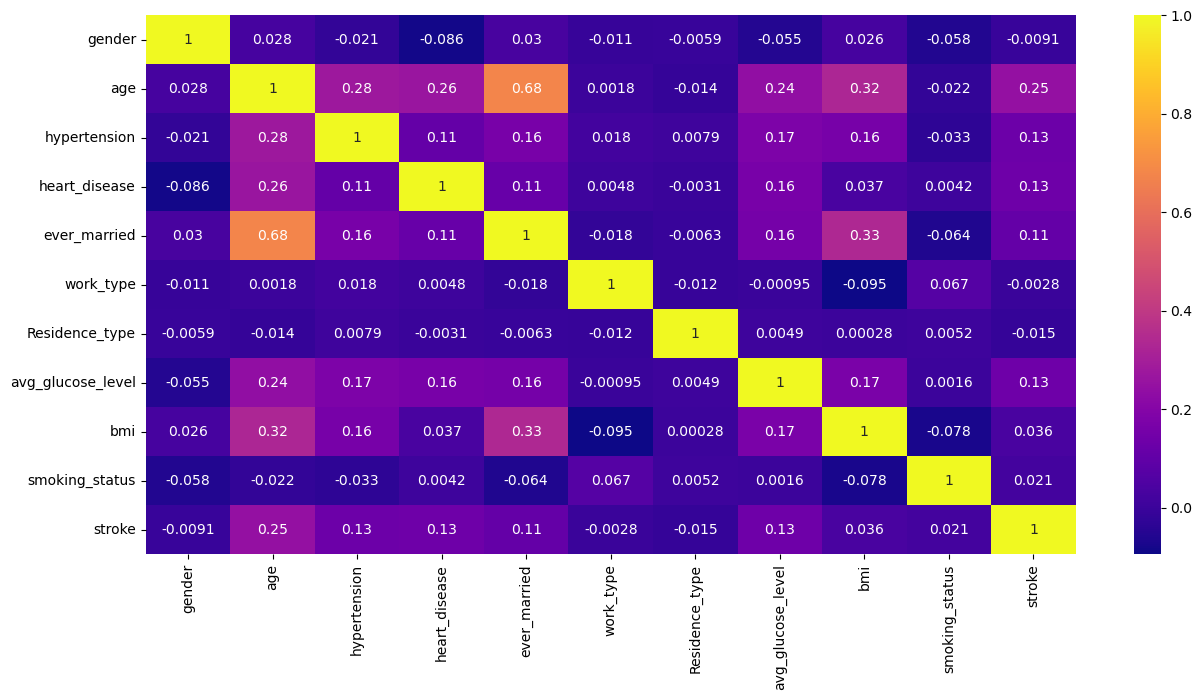

In [51]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

In [52]:
#Ever married and age has high correlation of 0.68, other than that no high corelation found.

#### Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio

In [53]:
x=df.drop('stroke',axis=1)
y=df['stroke']

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=17)

#### Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique

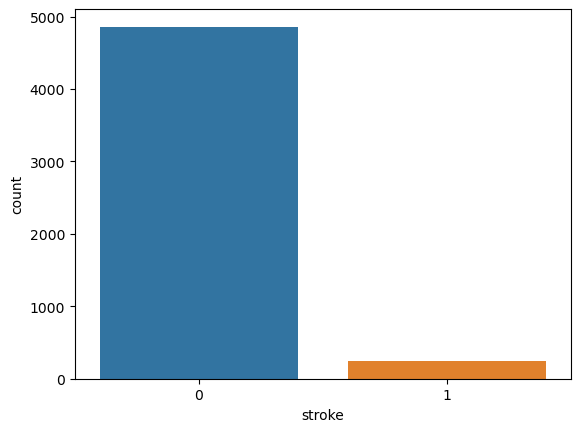

0    4861
1     249
Name: stroke, dtype: int64


In [55]:
sns.countplot(x=df['stroke'])
plt.show()
print(df['stroke'].value_counts())

In [56]:
#The dataset is high imbalanced.

In [57]:
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load your dataset (X, y)

# Check the class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Create a SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=17)

# Apply SMOTE to generate synthetic samples
x_resampled, y_resampled = smote.fit_resample(x, y)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({0: 4861, 1: 249})
Class distribution after SMOTE: Counter({1: 4861, 0: 4861})


In [58]:
xtrain,xtest,ytrain,ytest=train_test_split(x_resampled,y_resampled,train_size=0.7,random_state=17)

In [59]:
print('Xtrain Shape:',xtrain.shape)
print('Xtest Shape:',xtest.shape)
print('ytrain Shape:',ytrain.shape)
print('ytest Shape:',ytest.shape)

Xtrain Shape: (6805, 10)
Xtest Shape: (2917, 10)
ytrain Shape: (6805,)
ytest Shape: (2917,)


####  Model Selection/hyperparameter tuning
- Try different models and fine tune their performance until you get the desired level of 
performance on the given dataset. 
 Model Evaluation 
- Evaluate the models using appropriate evaluation metrics

###### Logistic regression Model 

In [60]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(xtrain,ytrain)
ypred_lr_train=lr_model.predict(xtrain)
ypred_lr_test=lr_model.predict(xtest)
yprob_lr=lr_model.predict_proba(xtest)[:,1]

In [61]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
cols=['Model_name','Train_accuracy','Test_accuracy','precision','recall','kappa','f1_score','roc_auc_score']
result=pd.DataFrame(columns=cols)
model_stats=pd.Series({'Model_name':'LogisticRegression',
              'Train_accuracy':accuracy_score(ytrain,ypred_lr_train),
              'Test_accuracy':accuracy_score(ytest,ypred_lr_test),
               'precision':precision_score(ytest,ypred_lr_test),
                'recall':recall_score(ytest,ypred_lr_test),
                 'kappa':cohen_kappa_score(ytest,ypred_lr_test),
                'f1_score':f1_score(ytest,ypred_lr_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_lr)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.821455,0.81625,0.80173,0.835066,0.632618,0.818058,0.898085


##### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt_model=dt.fit(xtrain,ytrain)
yred_dt_train=dt_model.predict(xtrain)
yred_dt_test=dt_model.predict(xtest)
yprob_dt=dt_model.predict_proba(xtest)[:,1]

In [63]:
model_stats=pd.Series({'Model_name':'DecisionTree',
              'Train_accuracy':accuracy_score(ytrain,yred_dt_train),
              'Test_accuracy':accuracy_score(ytest,yred_dt_test),
               'precision':precision_score(ytest,yred_dt_test),
                'recall':recall_score(ytest,yred_dt_test),
                 'kappa':cohen_kappa_score(ytest,yred_dt_test),
                'f1_score':f1_score(ytest,yred_dt_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_dt)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.821455,0.816250,0.801730,0.835066,0.632618,0.818058,0.898085
1,DecisionTree,1.000000,0.899554,0.874837,0.930007,0.799219,0.901579,0.899875


##### Grid Search Cv-DT

In [64]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(class_weight='balanced',random_state=0)
params=({'criterion':['gini','entropy'],'max_depth':[5,10]})
grid=GridSearchCV(dt,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [65]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt1_model=dt1.fit(xtrain,ytrain)
ypred_dt1_train=dt1_model.predict(xtrain)
ypred_dt1_test=dt1_model.predict(xtest)
yprob_dt1=dt1_model.predict_proba(xtest)[:,1]

In [66]:
model_stats=pd.Series({'Model_name':'Decision Tree with Gridsearchcv',
              'Train_accuracy':accuracy_score(ytrain,ypred_dt1_train),
              'Test_accuracy':accuracy_score(ytest,ypred_dt1_test),
               'precision':precision_score(ytest,ypred_dt1_test),
                'recall':recall_score(ytest,ypred_dt1_test),
                 'kappa':cohen_kappa_score(ytest,ypred_dt1_test),
                'f1_score':f1_score(ytest,ypred_dt1_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_dt1)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.821455,0.816250,0.801730,0.835066,0.632618,0.818058,0.898085
1,DecisionTree,1.000000,0.899554,0.874837,0.930007,0.799219,0.901579,0.899875
2,Decision Tree with Gridsearchcv,0.827921,0.809050,0.763377,0.889813,0.618722,0.821760,0.894044


##### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(xtrain,ytrain)
ypred_rf_train=rf_model.predict(xtrain)
ypred_rf_test=rf_model.predict(xtest)
yprob_rf=rf_model.predict_proba(xtest)[:,1]

In [68]:
model_stats=pd.Series({'Model_name':'Random Forest ',
              'Train_accuracy':accuracy_score(ytrain,ypred_rf_train),
              'Test_accuracy':accuracy_score(ytest,ypred_rf_test),
               'precision':precision_score(ytest,ypred_rf_test),
                'recall':recall_score(ytest,ypred_rf_test),
                 'kappa':cohen_kappa_score(ytest,ypred_rf_test),
                'f1_score':f1_score(ytest,ypred_rf_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_rf)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.821455,0.816250,0.801730,0.835066,0.632618,0.818058,0.898085
1,DecisionTree,1.000000,0.899554,0.874837,0.930007,0.799219,0.901579,0.899875
2,Decision Tree with Gridsearchcv,0.827921,0.809050,0.763377,0.889813,0.618722,0.821760,0.894044
3,Random Forest,1.000000,0.939664,0.923180,0.957727,0.879362,0.940136,0.985021


##### KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
knn_model=kn.fit(xtrain,ytrain)
ypred_knn_train=knn_model.predict(xtrain)
ypred_knn_test=knn_model.predict(xtest)
yprob_knn=knn_model.predict_proba(xtest)[:,1]

In [70]:
model_stats=pd.Series({'Model_name':'K Nearest Neighbors',
              'Train_accuracy':accuracy_score(ytrain,ypred_knn_train),
              'Test_accuracy':accuracy_score(ytest,ypred_knn_test),
               'precision':precision_score(ytest,ypred_knn_test),
                'recall':recall_score(ytest,ypred_knn_test),
                 'kappa':cohen_kappa_score(ytest,ypred_knn_test),
                'f1_score':f1_score(ytest,ypred_knn_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_knn)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.821455,0.816250,0.801730,0.835066,0.632618,0.818058,0.898085
1,DecisionTree,1.000000,0.899554,0.874837,0.930007,0.799219,0.901579,0.899875
2,Decision Tree with Gridsearchcv,0.827921,0.809050,0.763377,0.889813,0.618722,0.821760,0.894044
3,Random Forest,1.000000,0.939664,0.923180,0.957727,0.879362,0.940136,0.985021
4,K Nearest Neighbors,0.912858,0.882071,0.820408,0.975052,0.764581,0.891070,0.946049


##### Naives Bayes-Gaussian NB

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb_model=gnb.fit(xtrain,ytrain)
ypred_gnb_train=gnb.predict(xtrain)
ypred_gnb_test=gnb.predict(xtest)
yprob_gnb=gnb.predict_proba(xtest)[:,1]

In [72]:
model_stats=pd.Series({'Model_name':'GaussianNB',
              'Train_accuracy':accuracy_score(ytrain,ypred_gnb_train),
              'Test_accuracy':accuracy_score(ytest,ypred_gnb_test),
               'precision':precision_score(ytest,ypred_gnb_test),
                'recall':recall_score(ytest,ypred_gnb_test),
                 'kappa':cohen_kappa_score(ytest,ypred_gnb_test),
                'f1_score':f1_score(ytest,ypred_gnb_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_gnb)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.821455,0.816250,0.801730,0.835066,0.632618,0.818058,0.898085
1,DecisionTree,1.000000,0.899554,0.874837,0.930007,0.799219,0.901579,0.899875
2,Decision Tree with Gridsearchcv,0.827921,0.809050,0.763377,0.889813,0.618722,0.821760,0.894044
3,Random Forest,1.000000,0.939664,0.923180,0.957727,0.879362,0.940136,0.985021
4,K Nearest Neighbors,0.912858,0.882071,0.820408,0.975052,0.764581,0.891070,0.946049
5,GaussianNB,0.793681,0.803908,0.774417,0.851698,0.608183,0.811221,0.883435


##### Naives Bayes-Bernoulli NB

In [73]:
from sklearn.naive_bayes import  BernoulliNB
bnb=BernoulliNB()
bnb_model=bnb.fit(xtrain,ytrain)
ypred_bnb_train=bnb_model.predict(xtrain)
ypred_bnb_test=bnb_model.predict(xtest)
yprob_bnb=bnb_model.predict_proba(xtest)[:,1]

In [74]:
model_stats=pd.Series({'Model_name':'BernoulliNB',
              'Train_accuracy':accuracy_score(ytrain,ypred_bnb_train),
              'Test_accuracy':accuracy_score(ytest,ypred_bnb_test),
               'precision':precision_score(ytest,ypred_bnb_test),
                'recall':recall_score(ytest,ypred_bnb_test),
                 'kappa':cohen_kappa_score(ytest,ypred_bnb_test),
                'f1_score':f1_score(ytest,ypred_bnb_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_bnb)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.821455,0.816250,0.801730,0.835066,0.632618,0.818058,0.898085
1,DecisionTree,1.000000,0.899554,0.874837,0.930007,0.799219,0.901579,0.899875
2,Decision Tree with Gridsearchcv,0.827921,0.809050,0.763377,0.889813,0.618722,0.821760,0.894044
3,Random Forest,1.000000,0.939664,0.923180,0.957727,0.879362,0.940136,0.985021
4,K Nearest Neighbors,0.912858,0.882071,0.820408,0.975052,0.764581,0.891070,0.946049
5,GaussianNB,0.793681,0.803908,0.774417,0.851698,0.608183,0.811221,0.883435
6,BernoulliNB,0.675680,0.676037,0.665339,0.694387,0.352298,0.679552,0.745280


##### Bagging Classifier

In [75]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc_model=bc.fit(xtrain,ytrain)
ypred_bc_train=bc_model.predict(xtrain)
ypred_bc_test=bc_model.predict(xtest)
yprob_bc=bc_model.predict_proba(xtest)[:,1]

In [76]:
model_stats=pd.Series({'Model_name':'Bagging Classifier',
              'Train_accuracy':accuracy_score(ytrain,ypred_bc_train),
              'Test_accuracy':accuracy_score(ytest,ypred_bc_test),
               'precision':precision_score(ytest,ypred_bc_test),
                'recall':recall_score(ytest,ypred_bc_test),
                 'kappa':cohen_kappa_score(ytest,ypred_bc_test),
                'f1_score':f1_score(ytest,ypred_bc_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_bc)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.821455,0.816250,0.801730,0.835066,0.632618,0.818058,0.898085
1,DecisionTree,1.000000,0.899554,0.874837,0.930007,0.799219,0.901579,0.899875
2,Decision Tree with Gridsearchcv,0.827921,0.809050,0.763377,0.889813,0.618722,0.821760,0.894044
3,Random Forest,1.000000,0.939664,0.923180,0.957727,0.879362,0.940136,0.985021
4,K Nearest Neighbors,0.912858,0.882071,0.820408,0.975052,0.764581,0.891070,0.946049
5,GaussianNB,0.793681,0.803908,0.774417,0.851698,0.608183,0.811221,0.883435
6,BernoulliNB,0.675680,0.676037,0.665339,0.694387,0.352298,0.679552,0.745280
7,Bagging Classifier,0.995885,0.930065,0.917734,0.943174,0.860155,0.930280,0.976012


##### Boosting-Ada Boost

In [77]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad_model=ad.fit(xtrain,ytrain)
ypred_ad_train=ad_model.predict(xtrain)
ypred_ad_test=ad_model.predict(xtest)
yprob_ad=ad_model.predict_proba(xtest)[:,1]

In [78]:
model_stats=pd.Series({'Model_name':'AdaBoost',
              'Train_accuracy':accuracy_score(ytrain,ypred_ad_train),
              'Test_accuracy':accuracy_score(ytest,ypred_ad_test),
               'precision':precision_score(ytest,ypred_ad_test),
                'recall':recall_score(ytest,ypred_ad_test),
                 'kappa':cohen_kappa_score(ytest,ypred_ad_test),
                'f1_score':f1_score(ytest,ypred_ad_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_ad)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.821455,0.816250,0.801730,0.835066,0.632618,0.818058,0.898085
1,DecisionTree,1.000000,0.899554,0.874837,0.930007,0.799219,0.901579,0.899875
2,Decision Tree with Gridsearchcv,0.827921,0.809050,0.763377,0.889813,0.618722,0.821760,0.894044
3,Random Forest,1.000000,0.939664,0.923180,0.957727,0.879362,0.940136,0.985021
4,K Nearest Neighbors,0.912858,0.882071,0.820408,0.975052,0.764581,0.891070,0.946049
5,GaussianNB,0.793681,0.803908,0.774417,0.851698,0.608183,0.811221,0.883435
6,BernoulliNB,0.675680,0.676037,0.665339,0.694387,0.352298,0.679552,0.745280
7,Bagging Classifier,0.995885,0.930065,0.917734,0.943174,0.860155,0.930280,0.976012
8,AdaBoost,0.848641,0.845732,0.825147,0.873181,0.691618,0.848485,0.927773


##### Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb_model=gb.fit(xtrain,ytrain)
ypred_gb_train=gb_model.predict(xtrain)
ypred_gb_test=gb_model.predict(xtest)
yprob_gb=gb_model.predict_proba(xtest)[:,1]

In [80]:
model_stats=pd.Series({'Model_name':'GradientBoosting',
              'Train_accuracy':accuracy_score(ytrain,ypred_gb_train),
              'Test_accuracy':accuracy_score(ytest,ypred_gb_test),
               'precision':precision_score(ytest,ypred_gb_test),
                'recall':recall_score(ytest,ypred_gb_test),
                 'kappa':cohen_kappa_score(ytest,ypred_gb_test),
                'f1_score':f1_score(ytest,ypred_gb_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_gb)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.821455,0.816250,0.801730,0.835066,0.632618,0.818058,0.898085
1,DecisionTree,1.000000,0.899554,0.874837,0.930007,0.799219,0.901579,0.899875
2,Decision Tree with Gridsearchcv,0.827921,0.809050,0.763377,0.889813,0.618722,0.821760,0.894044
3,Random Forest,1.000000,0.939664,0.923180,0.957727,0.879362,0.940136,0.985021
4,K Nearest Neighbors,0.912858,0.882071,0.820408,0.975052,0.764581,0.891070,0.946049
5,GaussianNB,0.793681,0.803908,0.774417,0.851698,0.608183,0.811221,0.883435
6,BernoulliNB,0.675680,0.676037,0.665339,0.694387,0.352298,0.679552,0.745280
7,Bagging Classifier,0.995885,0.930065,0.917734,0.943174,0.860155,0.930280,0.976012
8,AdaBoost,0.848641,0.845732,0.825147,0.873181,0.691618,0.848485,0.927773
9,GradientBoosting,0.891991,0.877957,0.858746,0.901594,0.756014,0.879648,0.949897


##### XG Boost

In [81]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg_model=xg.fit(xtrain,ytrain)
ypred_xg_train=xg_model.predict(xtrain)
ypred_xg_test=xg_model.predict(xtest)
yprob_xg=xg_model.predict_proba(xtest)[:,1]

In [82]:
model_stats=pd.Series({'Model_name':'XGBoost',
              'Train_accuracy':accuracy_score(ytrain,ypred_xg_train),
              'Test_accuracy':accuracy_score(ytest,ypred_xg_test),
               'precision':precision_score(ytest,ypred_xg_test),
                'recall':recall_score(ytest,ypred_xg_test),
                 'kappa':cohen_kappa_score(ytest,ypred_xg_test),
                'f1_score':f1_score(ytest,ypred_xg_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_xg)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.821455,0.816250,0.801730,0.835066,0.632618,0.818058,0.898085
1,DecisionTree,1.000000,0.899554,0.874837,0.930007,0.799219,0.901579,0.899875
2,Decision Tree with Gridsearchcv,0.827921,0.809050,0.763377,0.889813,0.618722,0.821760,0.894044
3,Random Forest,1.000000,0.939664,0.923180,0.957727,0.879362,0.940136,0.985021
4,K Nearest Neighbors,0.912858,0.882071,0.820408,0.975052,0.764581,0.891070,0.946049
5,GaussianNB,0.793681,0.803908,0.774417,0.851698,0.608183,0.811221,0.883435
6,BernoulliNB,0.675680,0.676037,0.665339,0.694387,0.352298,0.679552,0.745280
7,Bagging Classifier,0.995885,0.930065,0.917734,0.943174,0.860155,0.930280,0.976012
8,AdaBoost,0.848641,0.845732,0.825147,0.873181,0.691618,0.848485,0.927773
9,GradientBoosting,0.891991,0.877957,0.858746,0.901594,0.756014,0.879648,0.949897


Based on the evaluation metrics, "Ada Boost","Gradient Boosting", "XGBoost" appear to be strong candidates due to their high performance across various metrics